## Using Spotify API

In [122]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from three_feature_vector_consolidation import consolidate_features

directory_path = './character_datasets_postprocess'
consolidated_character_vectors = []

for filename in os.listdir(directory_path):
    file_path = os.path.join(directory_path, filename)
    char_df = pd.read_csv(file_path)
    consolidated = consolidate_features(char_df)
    consolidated['Character'] = filename.replace("_", " ").replace(".csv", "")
    consolidated_character_vectors.append(consolidated)

/Users/jay/cdc2023/three_feature_vector_consolidation.py:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  consolidated_feature_vector = spotify_features_df.mean()
/Users/jay/cdc2023/three_feature_vector_consolidation.py:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  consolidated_feature_vector = spotify_features_df.mean()
/Users/jay/cdc2023/three_feature_vector_consolidation.py:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifyi

In [123]:
consolidate_characters = pd.DataFrame(consolidated_character_vectors).iloc[:, 1:]

In [124]:
consolidate_characters

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,Character
0,0.000039,0.000039,1.0,0.000039,0.000037,0.000038,0.0,0.000037,0.000576,0.000039,Ted Mosby
1,0.000042,0.000043,1.0,0.000043,0.000040,0.000041,0.0,0.000040,0.000590,0.000042,Rachel Green
2,0.000051,0.000050,1.0,0.000049,0.000048,0.000048,0.0,0.000048,0.000580,0.000049,Phoebe Buffay
3,0.000035,0.000036,1.0,0.000036,0.000036,0.000034,0.0,0.000034,0.000478,0.000035,Ross Geller
4,0.000038,0.000040,1.0,0.000041,0.000037,0.000038,0.0,0.000038,0.000678,0.000040,Robin Scherbatsky
5,0.000028,0.000030,1.0,0.000031,0.000027,0.000028,0.0,0.000028,0.000702,0.000030,Marshall Eriksen
6,0.000046,0.000047,1.0,0.000048,0.000046,0.000045,0.0,0.000045,0.000704,0.000047,Jim Halpert
7,0.000037,0.000038,1.0,0.000039,0.000036,0.000037,0.0,0.000036,0.000640,0.000039,Monica Geller
8,0.000053,0.000053,1.0,0.000053,0.000051,0.000052,0.0,0.000051,0.000666,0.000053,Chandler Bing
9,0.000033,0.000034,1.0,0.000034,0.000031,0.000032,0.0,0.000031,0.000558,0.000033,Lily Aldrin


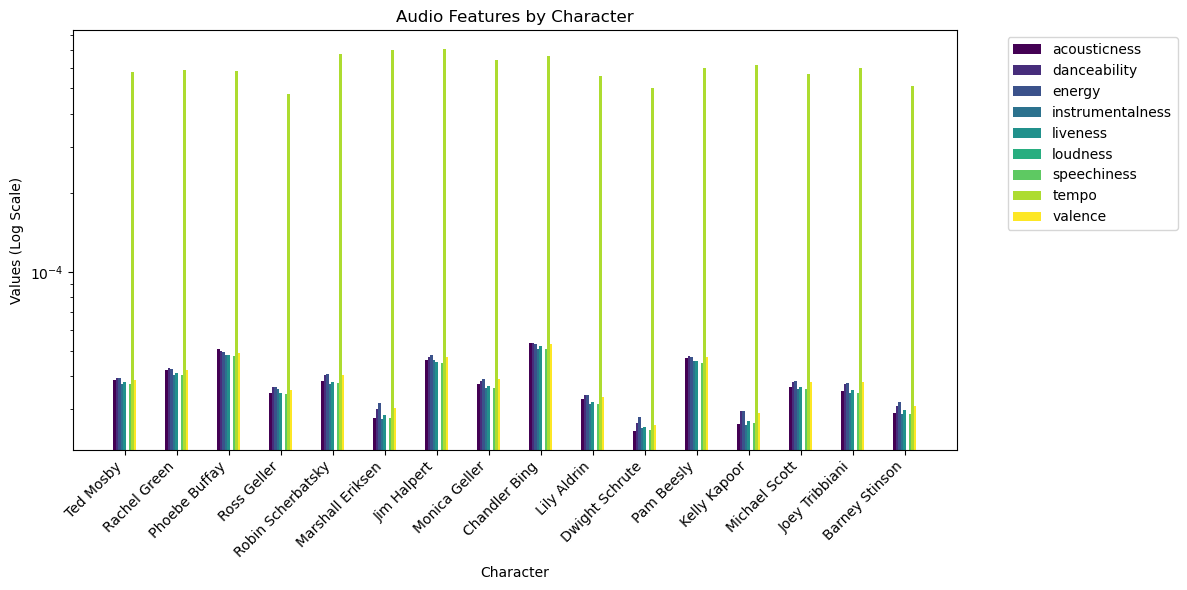

In [125]:
features = consolidate_characters.columns[:-1]  # Exclude the 'Character' column

# Remove duration_ms column as it's constant
consolidate_characters.drop('duration_ms', axis=1, inplace=True)
features = features.drop('duration_ms')

# Create the grouped bar chart
num_features = len(features)
bar_width = 0.05
index = np.arange(len(consolidate_characters['Character']))
colors = plt.cm.viridis(np.linspace(0, 1, num_features))

fig, ax = plt.subplots(figsize=(12, 6))
for i, feature in enumerate(features):
    ax.bar(index + i*bar_width, consolidate_characters[feature], bar_width, label=feature, color=colors[i], log=True)

ax.set_xlabel('Character')
ax.set_ylabel('Values (Log Scale)')
ax.set_title('Audio Features by Character')
ax.set_xticks(index + bar_width * (num_features-1) / 2)
ax.set_xticklabels(consolidate_characters['Character'], rotation=45, ha='right')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [126]:
from one_api_calls import get_user

jay_music = get_user('jay.sakarvadia')

Max Retries reached


SpotifyException: http status: 429, code:-1 - /v1/audio-features/?ids=2KhS0LVOw9ralhfbcIi7vL:
 Max Retries, reason: too many 429 error responses

In [ ]:
from two_preprocessing import get_feature_list

jay_music_consolidated = pd.DataFrame(consolidate_features(get_feature_list(jay_music)))
jay_music_consolidated

/Users/jay/cdc2023/two_preprocessing.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_features_df[['acousticness','danceability','duration_ms','energy','instrumentalness','liveness','loudness','speechiness','tempo','valence']] = scaled_features.T
/Users/jay/cdc2023/three_feature_vector_consolidation.py:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  consolidated_feature_vector = spotify_features_df.mean()


,0
acousticness,0.000030
danceability,0.000033
duration_ms,1.000000
energy,0.000033
instrumentalness,0.000030
liveness,0.000030
loudness,0.000000
speechiness,0.000030
tempo,0.000644
valence,0.000032


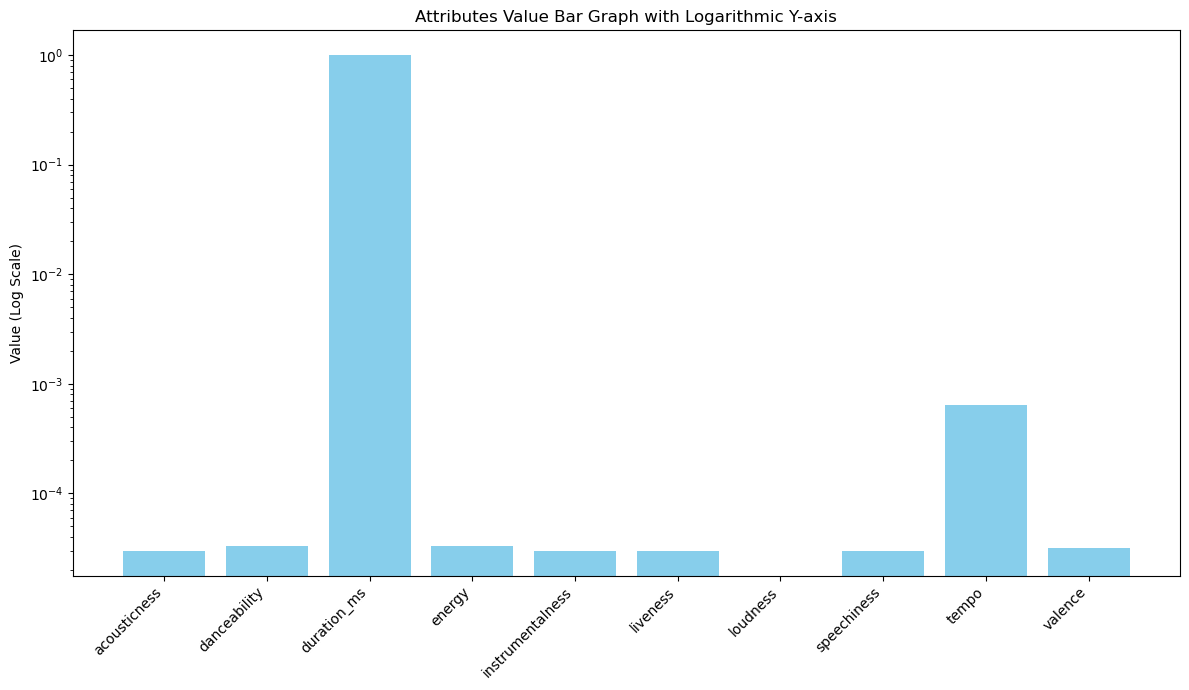

In [ ]:
jay_music_consolidated_data = {
    'Attribute': ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 
                  'liveness', 'loudness', 'speechiness', 'tempo', 'valence'],
    'Value': [0.000030, 0.000033, 1.000000, 0.000033, 0.000030, 
              0.000030, 0.000000, 0.000030, 0.000644, 0.000032]
}
jay_music_consolidated_data_bargraph = pd.DataFrame(jay_music_consolidated_data)

# Plotting
plt.figure(figsize=(12, 7))
plt.bar(jay_music_consolidated_data_bargraph['Attribute'], jay_music_consolidated_data_bargraph['Value'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.ylabel('Value (Log Scale)')
plt.title('Attributes Value Bar Graph with Logarithmic Y-axis')
plt.tight_layout()
plt.show()

In [ ]:
from four_cosine_similarity import cosine_calc

consolidate_characters['cosine_similarity'] = consolidate_characters.apply(lambda x: cosine_calc(x.iloc[:-1], jay_music_consolidated), axis=1)

ValueError: shapes (9,) and (10,) not aligned: 9 (dim 0) != 10 (dim 0)

In [ ]:
consolidate_characters = consolidate_characters.sort_values('cosine_similarity', ascending=False)
sum_cosine_similarity = consolidate_characters['cosine_similarity'].sum()

consolidate_characters['% Similarity Breakdown'] = pd.DataFrame((consolidate_characters['cosine_similarity'] / sum_cosine_similarity)*100)

#sanity check
sum_percentages_breakdown = consolidate_characters['% Similarity Breakdown'].sum()
sum_percentages_breakdown



100.0

In [ ]:
consolidate_characters

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,Character,cosine_similarity,% Similarity Breakdown
3,0.000035,0.000036,1.0,0.000036,0.000036,0.000034,0.0,0.000034,0.000478,0.000035,Ross Geller,0.009560,13.789900
10,0.000025,0.000027,1.0,0.000028,0.000025,0.000025,0.0,0.000025,0.000503,0.000026,Dwight Schrute,0.008130,11.726857
15,0.000029,0.000031,1.0,0.000032,0.000029,0.000030,0.0,0.000029,0.000510,0.000031,Barney Stinson,0.007676,11.071547
9,0.000033,0.000034,1.0,0.000034,0.000031,0.000032,0.0,0.000031,0.000558,0.000033,Lily Aldrin,0.004949,7.138952
2,0.000051,0.000050,1.0,0.000049,0.000048,0.000048,0.0,0.000048,0.000580,0.000049,Phoebe Buffay,0.004583,6.611331
13,0.000037,0.000038,1.0,0.000038,0.000036,0.000036,0.0,0.000036,0.000568,0.000038,Michael Scott,0.004451,6.419764
6,0.000046,0.000047,1.0,0.000048,0.000046,0.000045,0.0,0.000045,0.000704,0.000047,Jim Halpert,0.004122,5.946094
0,0.000039,0.000039,1.0,0.000039,0.000037,0.000038,0.0,0.000037,0.000576,0.000039,Ted Mosby,0.004062,5.858536
11,0.000047,0.000048,1.0,0.000047,0.000045,0.000046,0.0,0.000045,0.000597,0.000047,Pam Beesly,0.003546,5.115423
1,0.000042,0.000043,1.0,0.000043,0.000040,0.000041,0.0,0.000040,0.000590,0.000042,Rachel Green,0.003510,5.062877


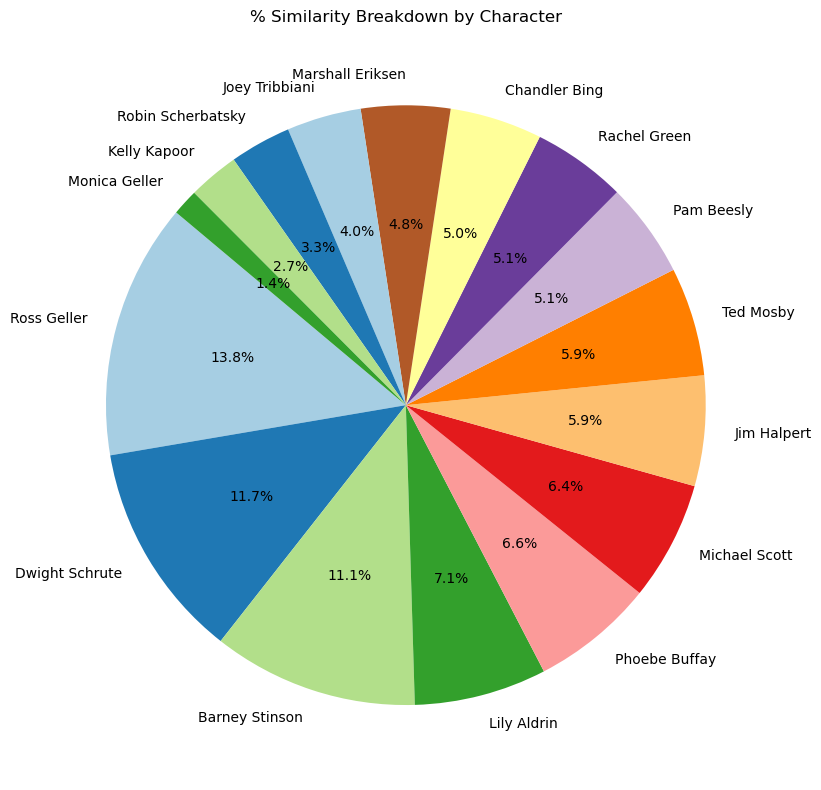

In [ ]:
consolidate_characters_piedata = {
    'Character': ['Ross Geller', 'Dwight Schrute', 'Barney Stinson', 'Lily Aldrin', 'Phoebe Buffay', 'Michael Scott', 
                  'Jim Halpert', 'Ted Mosby', 'Pam Beesly', 'Rachel Green', 'Chandler Bing', 'Marshall Eriksen',
                  'Joey Tribbiani', 'Robin Scherbatsky', 'Kelly Kapoor', 'Monica Geller'],
    '% Similarity Breakdown': [13.789900, 11.726857, 11.071547, 7.138952, 6.611331, 6.419764, 5.946094, 
                               5.858536, 5.115423, 5.062877, 4.978007, 4.804801, 4.012795, 3.308955, 2.740511, 1.413650]
}
consolidate_characters_piedata = pd.DataFrame(consolidate_characters_piedata)

# Plotting the pie chart
plt.figure(figsize=(12, 8))
plt.pie(consolidate_characters_piedata['% Similarity Breakdown'], labels=consolidate_characters_piedata['Character'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('% Similarity Breakdown by Character')
plt.tight_layout()
plt.show()